In [1]:
!pip install import-ipynb

In [2]:
import import_ipynb

## TASK 1:

Importing the stage2 jupyter notebook

In [3]:
import SaipavanTadikonda_stage2 as stage_2

importing Jupyter notebook from SaipavanTadikonda_stage2.ipynb


<string>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
<string>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<string>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log



Importing all the required libraries 

In [4]:
import pandas as pd
import plotly.express as pe
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime
import plotly.graph_objects as pgo
from IPython.display import Image
import scipy.stats as stats
import seaborn as sns
from heatmap import heatmap, corrplot
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

#### i) Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that

Getting the weekly Normalized data of North Carolina state from stage2

In [5]:
nc_weekly_normalized = stage_2.nc_weekly

In [6]:
nc_weekly_normalized

,Date,Normalized_new_cases,Normalized_new_deaths
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
78,2021-07-25,12.0,0.0
79,2021-08-01,22.0,0.0
80,2021-08-08,31.0,0.0
81,2021-08-15,49.0,0.0


Getting the weekly cases and deaths data of North Carolina state from stage2

In [7]:
nc_weekly_cases = stage_2.nc_weekly_1
nc_weekly_cases

,Date,new_cases,new_deaths
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
78,2021-07-25,1293.0,7.0
79,2021-08-01,2307.0,9.0
80,2021-08-08,3294.0,14.0
81,2021-08-15,5167.0,13.0


Plotting a histogram plot for weekly Normalized_new_cases of NC state

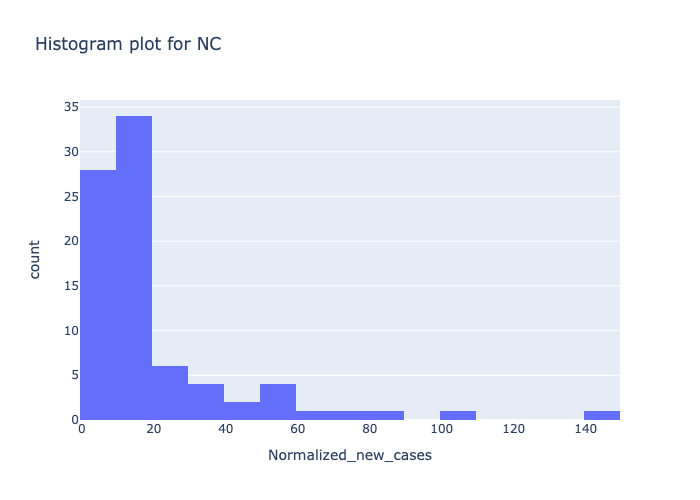

In [8]:
fig1 = pe.histogram(nc_weekly_normalized, x ='Normalized_new_cases', title = 'Histogram plot for NC')
fig1.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig1.png')
f1 = fig1.to_image(format="png")
Image(f1)

#fig.show()

In order to apply gamma distribution we need to calculate the PDF and for calculating pdf we need mean, variance, alpha and beta values

In [9]:
mean = nc_weekly_normalized['Normalized_new_cases'].mean()
variance = nc_weekly_normalized['Normalized_new_cases'].var()
alpha_mom = mean ** 2 / variance
beta_mom = variance /mean
nc_weekly_normalized['NC_PDF'] = stats.gamma.pdf(range(0,len(nc_weekly_normalized),1),alpha_mom,beta_mom)
nc_weekly_normalized

,Date,Normalized_new_cases,Normalized_new_deaths,NC_PDF
0,2020-01-26,0.0,0.0,0.000000e+00
1,2020-02-02,0.0,0.0,0.000000e+00
2,2020-02-09,0.0,0.0,0.000000e+00
3,2020-02-16,0.0,0.0,0.000000e+00
4,2020-02-23,0.0,0.0,0.000000e+00
...,...,...,...,...
78,2021-07-25,12.0,0.0,7.677096e-23
79,2021-08-01,22.0,0.0,2.807335e-23
80,2021-08-08,31.0,0.0,1.026698e-23
81,2021-08-15,49.0,0.0,3.755261e-24


Now plotting the gamma distribution as subplot on the NC normalized new cases histogram plot

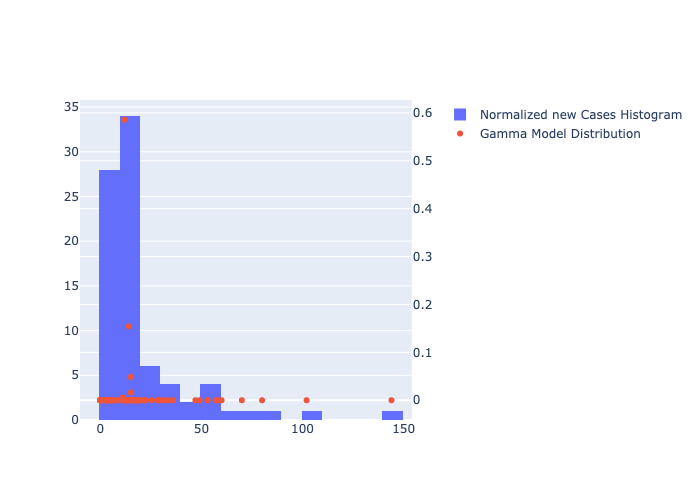

In [10]:
fig2 = pgo.Figure()
# Create figure with secondary y-axis
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(pgo.Histogram(x=nc_weekly_normalized['Normalized_new_cases'],name="Normalized new Cases Histogram"))
fig2.add_trace(pgo.Scatter(x=nc_weekly_normalized['Normalized_new_cases'], y=nc_weekly_normalized["NC_PDF"],mode='markers', name="Gamma Model Distribution"), secondary_y=True)
fig2.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig2.png')
f2 = fig2.to_image(format="png")
Image(f2)

From the above plot it is evident that gamma distribution is not a good fit for our data. 

Some observations that can be made from our NC weekly normalized new cases histogram plot are:

- 1)	The data we have are discrete values.
- 2)	The data has positive values as we calculated the covid cases per week.
- 3)	It starts of high and has long tail.
- 4)	We can also observe that the data is right skewed.

We know that the Poisson distribution model gives us the probability of a given number of events happening in a fixed interval of time and our data is also of same kind the poisson distribution may be the best fit for our data.

In order to apply poisson's distribution we need to calculate pmf. So finding the pmf vlaues by using k value and mean

In [11]:
nc_weekly_normalized['NC_PMF'] = stats.poisson.pmf(k = nc_weekly_normalized['Normalized_new_cases'], mu = nc_weekly_normalized['Normalized_new_cases'].mean())
nc_weekly_normalized

,Date,Normalized_new_cases,Normalized_new_deaths,NC_PDF,NC_PMF
0,2020-01-26,0.0,0.0,0.000000e+00,2.162919e-09
1,2020-02-02,0.0,0.0,0.000000e+00,2.162919e-09
2,2020-02-09,0.0,0.0,0.000000e+00,2.162919e-09
3,2020-02-16,0.0,0.0,0.000000e+00,2.162919e-09
4,2020-02-23,0.0,0.0,0.000000e+00,2.162919e-09
...,...,...,...,...,...
78,2021-07-25,12.0,0.0,7.677096e-23,1.796760e-02
79,2021-08-01,22.0,0.0,2.807335e-23,7.653902e-02
80,2021-08-08,31.0,0.0,1.026698e-23,5.241648e-03
81,2021-08-15,49.0,0.0,3.755261e-24,1.778546e-08


Plotting the poisson distribution model as subplot on the NC weekly normalized new cases histogram plot

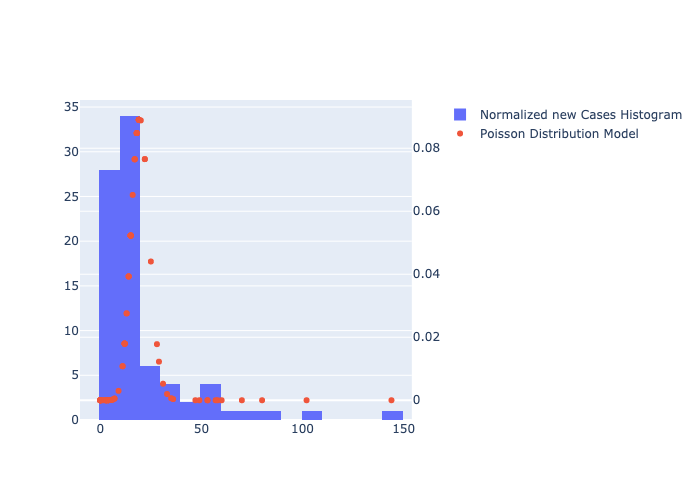

In [12]:
fig3 = pgo.Figure()
# Create figure with secondary y-axis
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(pgo.Histogram(x=nc_weekly_normalized['Normalized_new_cases'],name="Normalized new Cases Histogram"))
fig3.add_trace(pgo.Scatter(x=nc_weekly_normalized['Normalized_new_cases'], y=nc_weekly_normalized["NC_PMF"],mode='markers', name="Poisson Distribution Model"), secondary_y=True)
fig3.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig3.png')
f3 = fig3.to_image(format="png")
Image(f3)

From the above plot we can observe that poisson distribution almost fits for our data

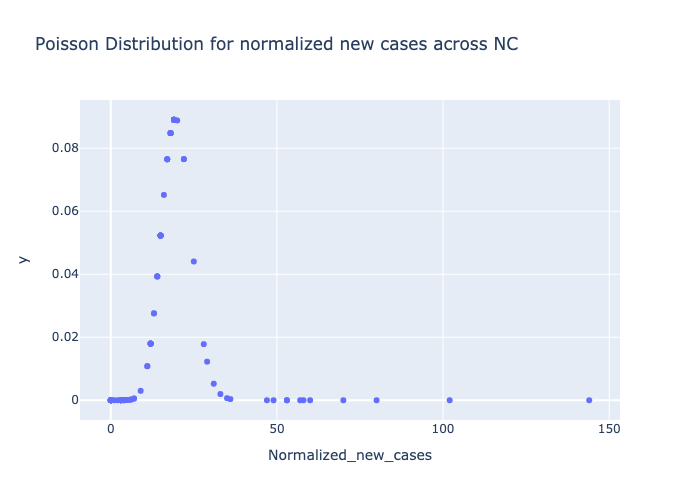

In [13]:
fig_scatter = pe.scatter(nc_weekly_normalized, x=nc_weekly_normalized['Normalized_new_cases'], y=stats.poisson.pmf(k=nc_weekly_normalized['Normalized_new_cases'],mu=nc_weekly_normalized['Normalized_new_cases'].mean()),title='Poisson Distribution for normalized new cases across NC')
fig_scatter.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig_scatter.png')
fig_scatter = fig_scatter.to_image(format="png")
Image(fig_scatter)
#fig.show()

#### ii) Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.

The Poisson distribution model which we obtained actually has only one peak. Therefore, the modality of the distribution is unimodal.

Moments of distribution are calculated below

In [14]:
print('Center:',nc_weekly_normalized['Normalized_new_cases'].mean(),'\nVariance:',nc_weekly_normalized['Normalized_new_cases'].var(),'\nSkewness:',nc_weekly_normalized['Normalized_new_cases'].skew(),'\nKurtosis:',nc_weekly_normalized['Normalized_new_cases'].kurt())



Center: 19.951807228915662 
Variance: 568.8513076697031 
Skewness: 2.7153802418893136 
Kurtosis: 9.637462365689153


#### iii) Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply

Getting the weekly data of the selected states from the stage2 

In [15]:
selected_states_weekly_1 = stage_2.selected_states_weekly_1
selected_states_weekly_1

,State,Date,Normalized_new_cases,Normalized_new_deaths
0,CA,2020-01-26,0.001265,0.000000
1,CA,2020-02-02,0.000723,0.000000
2,CA,2020-02-09,0.000723,0.000362
3,CA,2020-02-16,0.000723,0.000000
4,CA,2020-02-23,0.001446,0.000362
...,...,...,...,...
493,TX,2021-07-25,17.632061,0.096565
494,TX,2021-08-01,31.053179,0.127112
495,TX,2021-08-08,47.780185,0.175887
496,TX,2021-08-15,48.721698,0.309404


Separating the CA state weekly normalized cases and deaths into a separate dataframe in order to observe the distribution.

In [16]:
ca_weekly_normalized = selected_states_weekly_1[selected_states_weekly_1['State']=='CA']
ca_weekly_normalized

,State,Date,Normalized_new_cases,Normalized_new_deaths
0,CA,2020-01-26,0.001265,0.000000
1,CA,2020-02-02,0.000723,0.000000
2,CA,2020-02-09,0.000723,0.000362
3,CA,2020-02-16,0.000723,0.000000
4,CA,2020-02-23,0.001446,0.000362
...,...,...,...,...
78,CA,2021-07-25,13.620378,0.052063
79,CA,2021-08-01,19.636600,0.070864
80,CA,2021-08-08,26.441727,0.108466
81,CA,2021-08-15,29.163489,-0.056041


Plotting the histogram plot for the CA weekly normalized new cases

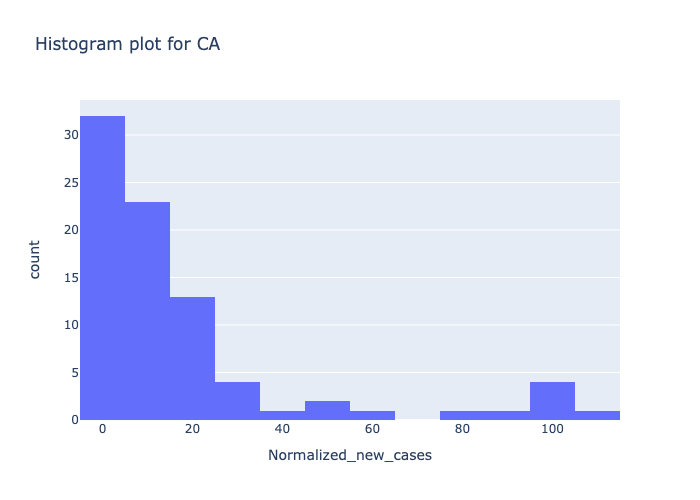

In [17]:
fig4 = pe.histogram(ca_weekly_normalized, x ='Normalized_new_cases', title= 'Histogram plot for CA' )
fig4.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig4.png')
f4 = fig4.to_image(format="png")
Image(f4)

In order to apply poisson's distribution we need to calculate pmf. So finding the pmf vlaues by using k value and mean

In [18]:
ca_weekly_normalized['Normalized_new_cases'] = ca_weekly_normalized['Normalized_new_cases'].round(decimals=0)
ca_weekly_normalized['Normalized_new_deaths'] = ca_weekly_normalized['Normalized_new_deaths'].round(decimals=0)

ca_weekly_normalized['CA_PMF'] = stats.poisson.pmf(k = ca_weekly_normalized['Normalized_new_cases'], mu = ca_weekly_normalized['Normalized_new_cases'].mean())
ca_weekly_normalized

,State,Date,Normalized_new_cases,Normalized_new_deaths,CA_PMF
0,CA,2020-01-26,0.0,0.0,8.439342e-09
1,CA,2020-02-02,0.0,0.0,8.439342e-09
2,CA,2020-02-09,0.0,0.0,8.439342e-09
3,CA,2020-02-16,0.0,0.0,8.439342e-09
4,CA,2020-02-23,0.0,0.0,8.439342e-09
...,...,...,...,...,...
78,CA,2021-07-25,14.0,0.0,5.700723e-02
79,CA,2021-08-01,20.0,0.0,8.432195e-02
80,CA,2021-08-08,26.0,0.0,2.099777e-02
81,CA,2021-08-15,29.0,-0.0,6.153426e-03


Plotting the poisson distribution model as subplot on the CA weekly normalized new cases histogram plot

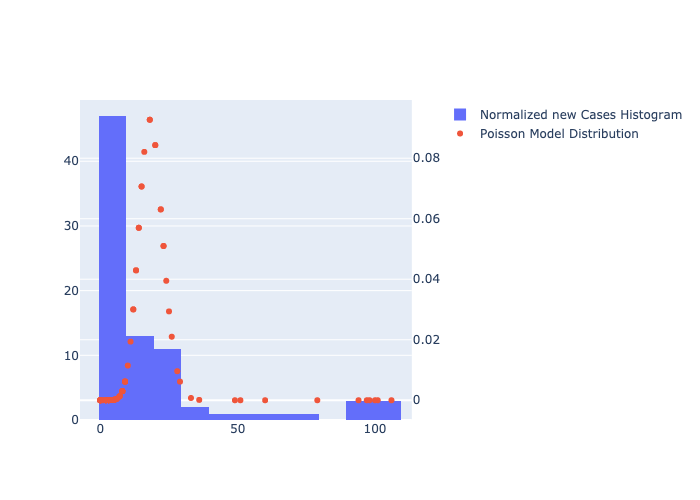

In [19]:
fig11 = pgo.Figure()
# Create figure with secondary y-axis
fig11 = make_subplots(specs=[[{"secondary_y": True}]])
fig11.add_trace(pgo.Histogram(x=ca_weekly_normalized['Normalized_new_cases'],name="Normalized new Cases Histogram"))
fig11.add_trace(pgo.Scatter(x=ca_weekly_normalized['Normalized_new_cases'], y=ca_weekly_normalized["CA_PMF"],mode='markers', name="Poisson Model Distribution"), secondary_y=True)
fig11.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig11.png')
f11 = fig11.to_image(format="png")
Image(f11)

Separating the FL state weekly normalized cases and deaths into a separate dataframe in order to observe the distribution.

In [20]:
fl_weekly_normalized = selected_states_weekly_1[selected_states_weekly_1['State']=='FL']
fl_weekly_normalized

,State,Date,Normalized_new_cases,Normalized_new_deaths
83,FL,2020-01-26,0.000000,0.0
84,FL,2020-02-02,0.000000,0.0
85,FL,2020-02-09,0.000000,0.0
86,FL,2020-02-16,0.000000,0.0
87,FL,2020-02-23,0.000000,0.0
...,...,...,...,...
161,FL,2021-07-25,0.000000,0.0
162,FL,2021-08-01,73.641038,0.0
163,FL,2021-08-08,89.635009,0.0
164,FL,2021-08-15,100.945059,0.0


Plotting the histogram plot for the FL weekly normalized new cases

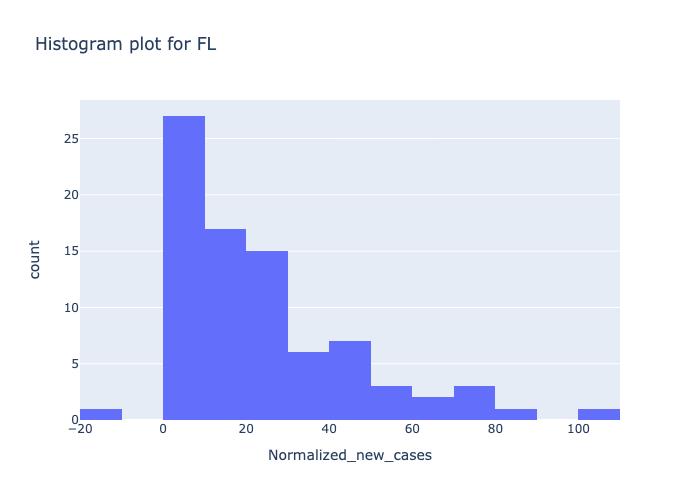

In [21]:
fig5 = pe.histogram(fl_weekly_normalized, x ='Normalized_new_cases', title ='Histogram plot for FL')
fig5.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig5.png')
f5 = fig5.to_image(format="png")
Image(f5)

Separating the NY state weekly normalized cases and deaths into a separate dataframe in order to observe the distribution.

In [22]:
ny_weekly_normalized = selected_states_weekly_1[selected_states_weekly_1['State']=='NY']
ny_weekly_normalized

,State,Date,Normalized_new_cases,Normalized_new_deaths
249,NY,2020-01-26,0.000000,0.000000
250,NY,2020-02-02,0.000000,0.000000
251,NY,2020-02-09,0.000000,0.000000
252,NY,2020-02-16,0.000000,0.000000
253,NY,2020-02-23,0.000000,0.000000
...,...,...,...,...
327,NY,2021-07-25,6.373420,0.030108
328,NY,2021-08-01,13.196262,0.029374
329,NY,2021-08-08,17.173499,0.042592
330,NY,2021-08-15,21.466507,0.084450


Plotting the histogram plot for the FL weekly normalized new cases

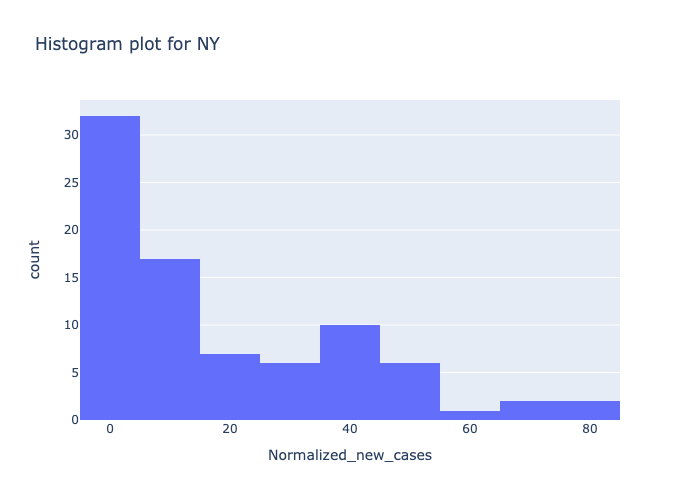

In [23]:
fig6 = pe.histogram(ny_weekly_normalized, x ='Normalized_new_cases',title ='Histogram plot for NY')
fig6.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig6.png')
f6 = fig6.to_image(format="png")
Image(f6)

Separating the SC state weekly normalized cases and deaths into a separate dataframe in order to observe the distribution.

In [24]:
sc_weekly_normalized = selected_states_weekly_1[selected_states_weekly_1['State']=='SC']
sc_weekly_normalized

,State,Date,Normalized_new_cases,Normalized_new_deaths
332,SC,2020-01-26,0.000000,0.000000
333,SC,2020-02-02,0.000000,0.000000
334,SC,2020-02-09,0.000000,0.000000
335,SC,2020-02-16,0.000000,0.000000
336,SC,2020-02-23,0.000000,0.000000
...,...,...,...,...
410,SC,2021-07-25,13.956328,0.044394
411,SC,2021-08-01,28.620184,0.072140
412,SC,2021-08-08,47.617993,0.127632
413,SC,2021-08-15,61.049919,0.246941


Plotting the histogram plot for the FL weekly normalized new cases

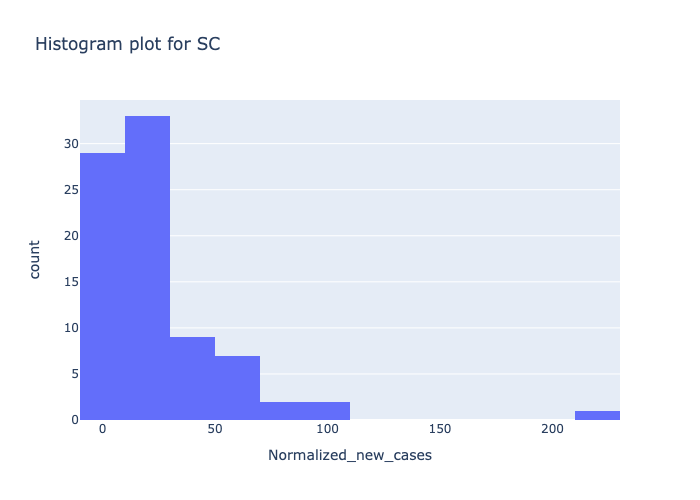

In [25]:
fig7 = pe.histogram(sc_weekly_normalized, x ='Normalized_new_cases', title = 'Histogram plot for SC')
fig7.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig7.png')
f7 = fig7.to_image(format="png")
Image(f7)

Separating the TX state weekly normalized cases and deaths into a separate dataframe in order to observe the distribution.

In [26]:
tx_weekly_normalized = selected_states_weekly_1[selected_states_weekly_1['State']=='TX']
tx_weekly_normalized

,State,Date,Normalized_new_cases,Normalized_new_deaths
415,TX,2020-01-26,0.000000,0.000000
416,TX,2020-02-02,0.000000,0.000000
417,TX,2020-02-09,0.000000,0.000000
418,TX,2020-02-16,0.000000,0.000000
419,TX,2020-02-23,0.000000,0.000000
...,...,...,...,...
493,TX,2021-07-25,17.632061,0.096565
494,TX,2021-08-01,31.053179,0.127112
495,TX,2021-08-08,47.780185,0.175887
496,TX,2021-08-15,48.721698,0.309404


Plotting the histogram plot for the TX weekly normalized new cases

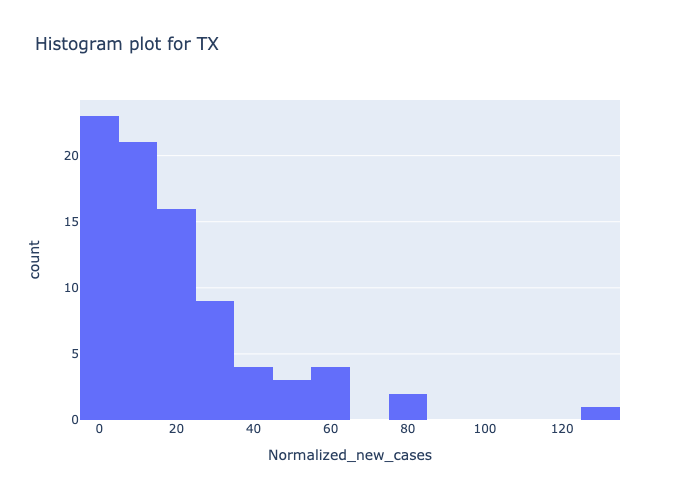

In [27]:
fig8 = pe.histogram(tx_weekly_normalized, x ='Normalized_new_cases',title = 'Histogram plot for TX')
fig8.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig8.png')
f8 = fig8.to_image(format="png")
Image(f8)

From the individual state histogram plots we can say that for all the selected states weekly cases are right skewed. The values start off high and has long tail at the end. And all the values are discrete. But the count of weekly cases is different. This is because those selected states have different population. Some states like South Carolina have less population but states like California has more population.

Statistics for all the 6 selected states along with the individual state population

In [28]:
selected_states_weekly_1_stats = selected_states_weekly_1.groupby('State')['Normalized_new_cases'].agg(['mean','var','skew']).reset_index()
selected_states_weekly_1_stats['kurtosis'] = list(selected_states_weekly_1.groupby('State')['Normalized_new_cases'].apply(pd.DataFrame.kurt))
selected_states_weekly_1_stats['Population']= stage_2.selected_states_weekly['Population'].unique()
selected_states_weekly_1_stats

,State,mean,var,skew,kurtosis,Population
0,CA,18.598905,708.599900,2.248283,4.214103,39512223.0
1,FL,23.057242,530.084387,1.210106,1.386629,21477737.0
2,NC,19.905846,567.013944,2.720754,9.673927,10488084.0
3,NY,19.586660,437.397476,1.138779,0.418709,19453561.0
4,SC,24.523143,956.100116,3.318850,16.709881,5148714.0
5,TX,19.973268,488.567620,2.308647,7.594456,28995881.0


From the above statistics we can observe that the South Carolina state has high kurtosis. It means that’s its data is highly tailed. New York has very low kurtosis value. 

Coming to the skewness all states skew values are positive. So, we can say that all states data are right skewed. It means right tails are long compared to left.

In [29]:
#for i in selected_states_weekly_1.State.unique():
    #print("Distribution of Normalized cases for State",i)
    #fig = pe.histogram(selected_states_weekly_1[selected_states_weekly_1['State']==i], x ='Normalized_new_cases')
    #fig.show()'''
    


## TASK2: Model a poission distribution of new COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did

Calculating the normalized new cases mean grouping by state

In [30]:
selected_states_weekly_1_cases_mean=selected_states_weekly_1.groupby('State')['Normalized_new_cases'].agg('mean').reset_index()
selected_states_weekly_1_cases_mean

,State,Normalized_new_cases
0,CA,18.598905
1,FL,23.057242
2,NC,19.905846
3,NY,19.586660
4,SC,24.523143
5,TX,19.973268


Now creating a dataframe which contains the mean, k-values and pmfs of all the selected states. Here k-values range depends on Normalized new cases values.

In [31]:
k_values = range(0,220,10)
states = selected_states_weekly_1_cases_mean['State']
cases_means = selected_states_weekly_1_cases_mean['Normalized_new_cases']
columns = ['state','mean','k_value','probability']

data={}
for column in columns:
    data[column]=[]
        
for idx, mean in enumerate(cases_means):
    for k_value in k_values:
        data['state'].append(states[idx])
        data['mean'].append(mean)
        data['k_value'].append(k_value)
        data['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
normalized_new_cases_poisson_data=pd.DataFrame.from_dict(data)

In [32]:
normalized_new_cases_poisson_data

,state,mean,k_value,probability
0,CA,18.598905,0,8.367548e-09
1,CA,18.598905,10,1.142113e-02
2,CA,18.598905,20,8.437642e-02
3,CA,18.598905,30,3.833181e-03
4,CA,18.598905,40,6.172316e-06
...,...,...,...,...
127,TX,19.973268,170,3.477692e-95
128,TX,19.973268,180,1.269384e-104
129,TX,19.973268,190,2.661743e-114
130,TX,19.973268,200,3.301100e-124


Plotting the poisson distribution of Normalized new cases across the six states. 

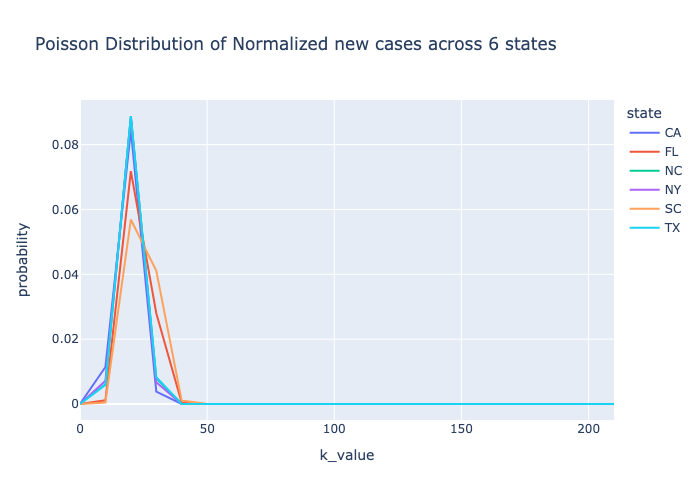

In [33]:
fig9 = pe.line(normalized_new_cases_poisson_data, x="k_value", y="probability", 
                 color='state',title='Poisson Distribution of Normalized new cases across 6 states')
fig9.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig9.png')
f9 = fig9.to_image(format="png")
Image(f9)
#fig.show()

In [34]:
selected_states_weekly_1['Normalized_new_cases'].min()

-17.375467177278235

In [35]:
selected_states_weekly_1['Normalized_new_cases'].max()

214.40305287883538

Calculating the normalized new deaths mean grouping by state

In [36]:
selected_states_weekly_1_deaths_mean=selected_states_weekly_1.groupby('State')['Normalized_new_deaths'].agg('mean').reset_index()
selected_states_weekly_1_deaths_mean

,State,Normalized_new_deaths
0,CA,0.281679
1,FL,0.296292
2,NC,0.233098
3,NY,0.474664
4,SC,0.351741
5,TX,0.315405


Now creating a dataframe which contains the mean, k-values and pmfs of all the selected states. Here k-values range depends on Normalized new deaths values.

In [37]:
k_values_1 = range(0,5)
states_1 = selected_states_weekly_1_deaths_mean['State']
deaths_means = selected_states_weekly_1_deaths_mean['Normalized_new_deaths']
columns = ['state','mean','k_value','probability']

data1={}     
for column in columns:
    data1[column]=[]
        
for idx1, mean in enumerate(deaths_means):
    for k_value in k_values_1:
        data1['state'].append(states_1[idx1])
        data1['mean'].append(mean)
        data1['k_value'].append(k_value)
        data1['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
normalized_new_deaths_poisson_data=pd.DataFrame.from_dict(data1)

In [38]:
normalized_new_deaths_poisson_data

,state,mean,k_value,probability
0,CA,0.281679,0,0.754516
1,CA,0.281679,1,0.212531
2,CA,0.281679,2,0.029933
3,CA,0.281679,3,0.002810
4,CA,0.281679,4,0.000198
5,FL,0.296292,0,0.743570
6,FL,0.296292,1,0.220314
7,FL,0.296292,2,0.032639
8,FL,0.296292,3,0.003224
9,FL,0.296292,4,0.000239


Plotting the poisson distribution of Normalized new deaths across the six states. 

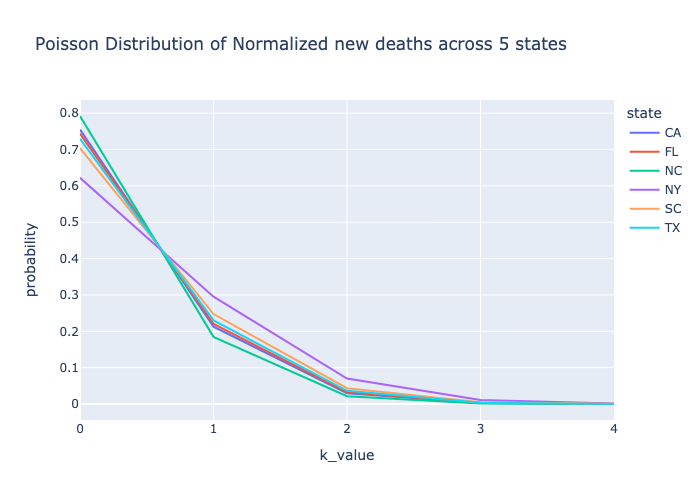

In [39]:
fig10 = pe.line(normalized_new_deaths_poisson_data, x="k_value", y="probability", 
                 color='state',title='Poisson Distribution of Normalized new deaths across 5 states')
fig10.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig10.png')
f10 = fig10.to_image(format="png")
Image(f10)
#fig.show()

The poisson distribution model is different from the gamma distribution model as the poisson distribution model deals with discrete values and even the data we have is discrete. So, poisson distribution is best fit for the comparison.

## TASK 3: Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns

Reading the modified enrichment census demographic dataset from the stage-1

In [40]:
census1 = pd.read_csv('../../../../data/Stage_1/census1.csv')
census1.head()

,countyFIPS,County Name,State,Total population,Males,Females,Sex ratio(males per 100 females),Under 5years,5-9years,10-14years,...,18years and over,18years and over Male,18years and over Female,Sex ratio(18years and over),White population,Black population,Asian population,Voting population,Voting population(Male),Voting population(Female)
0,1001,Autauga County,AL,55380,26934,28446,94.7,3217,3814,3600,...,42175,20164,22011,91.6,42527,10538,573,41647,19823,21824
1,1003,Baldwin County,AL,212830,103496,109334,94.7,11689,12058,14262,...,166595,79948,86647,92.3,183471,19718,1969,162883,77958,84925
2,1005,Barbour County,AL,25361,13421,11940,112.4,1349,1622,1422,...,20054,10760,9294,115.8,11869,12066,134,19728,10529,9199
3,1007,Bibb County,AL,22493,12150,10343,117.5,1315,1219,1132,...,17862,9547,8315,114.8,17272,5014,27,17662,9469,8193
4,1009,Blount County,AL,57681,28495,29186,97.6,3432,3590,4034,...,44292,21668,22624,95.8,55062,928,212,42722,20833,21889


Calculating the sum of all the columns grouping by state inorder to perform correlation across state level 

In [41]:
census1_1 = census1.groupby('State').sum().reset_index()
census1_1.head()

,State,countyFIPS,Total population,Males,Females,Sex ratio(males per 100 females),Under 5years,5-9years,10-14years,15-19years,...,18years and over,18years and over Male,18years and over Female,Sex ratio(18years and over),White population,Black population,Asian population,Voting population,Voting population(Male),Voting population(Female)
0,AK,62340,737068,384915,352153,3426.6,53237,52810,49269,46704,...,552674,289956,262718,3581.8,476015,24205,45920,530996,280398,250598
1,AL,71489,4876250,2359355,2516895,6356.7,293187,301064,310456,322486,...,3779874,1799897,1979977,6173.4,3320247,1299048,66270,3685074,1749845,1935229
2,AR,380625,2999370,1471760,1527610,7366.0,189636,196874,197804,201105,...,2295102,1111641,1183461,7216.8,2301044,459542,45504,2207333,1064813,1142520
3,AZ,60208,7050299,3504509,3545790,1526.4,433968,450570,471732,473352,...,5414955,2670328,2744627,1513.1,5444453,317462,233213,4920449,2422769,2497680
4,CA,351364,39283497,19526298,19757199,5985.2,2451528,2468226,2575463,2565170,...,30261351,14915402,15345949,5942.6,23453222,2274108,5692423,25494383,12511445,12982938


Selecting columns on which we can find the correlation

In [42]:
census1_1_final = census1_1[['State','Total population','Males','Females','18years and over','White population','Black population','Asian population']]
census1_1_final.head()

,State,Total population,Males,Females,18years and over,White population,Black population,Asian population
0,AK,737068,384915,352153,552674,476015,24205,45920
1,AL,4876250,2359355,2516895,3779874,3320247,1299048,66270
2,AR,2999370,1471760,1527610,2295102,2301044,459542,45504
3,AZ,7050299,3504509,3545790,5414955,5444453,317462,233213
4,CA,39283497,19526298,19757199,30261351,23453222,2274108,5692423


Reading the final covid dataset which contains the total cases, total deaths across all the counties from the stage-1

In [43]:
long = pd.read_csv('../../../../data/Stage_1/final_covid.csv')
long

,countyFIPS,County Name,State,StateFIPS,Total Cases,Total Deaths,Population
0,1001,Autauga County,AL,1,8061.0,114.0,55869.0
1,1003,Baldwin County,AL,1,29234.0,347.0,223234.0
2,1005,Barbour County,AL,1,2761.0,65.0,24686.0
3,1007,Bibb County,AL,1,3129.0,67.0,22394.0
4,1009,Blount County,AL,1,7833.0,141.0,57826.0
...,...,...,...,...,...,...,...
3088,56037,Sweetwater County,WY,56,5127.0,45.0,30485.0
3089,56039,Teton County,WY,56,4068.0,11.0,9831.0
3090,56041,Uinta County,WY,56,2593.0,14.0,42343.0
3091,56043,Washakie County,WY,56,967.0,26.0,23464.0


Calculating the sum of the columns in order obtain state level cases and deaths grouping by state

In [44]:
long_1 = long.groupby('State').sum().reset_index()
long_1.head()

,State,countyFIPS,StateFIPS,Total Cases,Total Deaths,Population
0,AK,62340,58,79016.0,383.0,726315.0
1,AL,71489,67,637363.0,11799.0,4903185.0
2,AR,375624,370,413931.0,6450.0,2996463.0
3,AZ,56207,56,955795.0,18022.0,7064930.0
4,CA,345363,342,3931417.0,62753.0,39213055.0


Selecting the State, total cases, total deaths columns

In [45]:
long_1_final = long_1[['State','Total Cases','Total Deaths']]
long_1_final.head()

,State,Total Cases,Total Deaths
0,AK,79016.0,383.0
1,AL,637363.0,11799.0
2,AR,413931.0,6450.0
3,AZ,955795.0,18022.0
4,CA,3931417.0,62753.0


Merging the covid dataset and enrichment dataset on state with required columns

In [46]:
merged = pd.merge(long_1_final, census1_1_final, on = 'State')
merged.head()

,State,Total Cases,Total Deaths,Total population,Males,Females,18years and over,White population,Black population,Asian population
0,AK,79016.0,383.0,737068,384915,352153,552674,476015,24205,45920
1,AL,637363.0,11799.0,4876250,2359355,2516895,3779874,3320247,1299048,66270
2,AR,413931.0,6450.0,2999370,1471760,1527610,2295102,2301044,459542,45504
3,AZ,955795.0,18022.0,7050299,3504509,3545790,5414955,5444453,317462,233213
4,CA,3931417.0,62753.0,39283497,19526298,19757199,30261351,23453222,2274108,5692423


From all the states selecting the states which I selected in stage-2

In [47]:
merged_selected = merged[merged['State'].isin(['CA','FL','NY','SC','TX','NC'])]
merged_selected


,State,Total Cases,Total Deaths,Total population,Males,Females,18years and over,White population,Black population,Asian population
4,CA,3931417.0,62753.0,39283497,19526298,19757199,30261351,23453222,2274108,5692423
9,FL,2846389.0,36688.0,20901636,10220813,10680823,16719174,15702256,3359031,571276
27,NC,1117533.0,13795.0,10264876,4996638,5268238,7968262,7049919,2200761,292992
34,NY,2162862.0,52958.0,19572319,9501001,10071318,15463820,12459687,3065471,1647606
40,SC,647312.0,9876.0,5020806,2435472,2585334,3918304,3372011,1344139,78805
43,TX,3327842.0,53034.0,28260856,14034009,14226847,20922411,20903375,3428211,1357273


Finding the correlation using the corr function.

In [48]:
merged_selected.corr()

,Total Cases,Total Deaths,Total population,Males,Females,18years and over,White population,Black population,Asian population
Total Cases,1.000000,0.908097,0.974470,0.973409,0.975353,0.974298,0.994818,0.617846,0.742163
Total Deaths,0.908097,1.000000,0.918905,0.915203,0.922438,0.920252,0.906257,0.614487,0.753304
Total population,0.974470,0.918905,1.000000,0.999909,0.999910,0.998680,0.977678,0.472293,0.864993
Males,0.973409,0.915203,0.999909,1.000000,0.999638,0.998096,0.977408,0.464859,0.866365
Females,0.975353,0.922438,0.999910,0.999638,1.000000,0.999083,0.977772,0.479636,0.863465
18years and over,0.974298,0.920252,0.998680,0.998096,0.999083,1.000000,0.972838,0.474531,0.870197
White population,0.994818,0.906257,0.977678,0.977408,0.977772,0.972838,1.000000,0.609552,0.741756
Black population,0.617846,0.614487,0.472293,0.464859,0.479636,0.474531,0.609552,1.000000,0.016227
Asian population,0.742163,0.753304,0.864993,0.866365,0.863465,0.870197,0.741756,0.016227,1.000000


Plotting the correlation using the heatmaps

<AxesSubplot:>

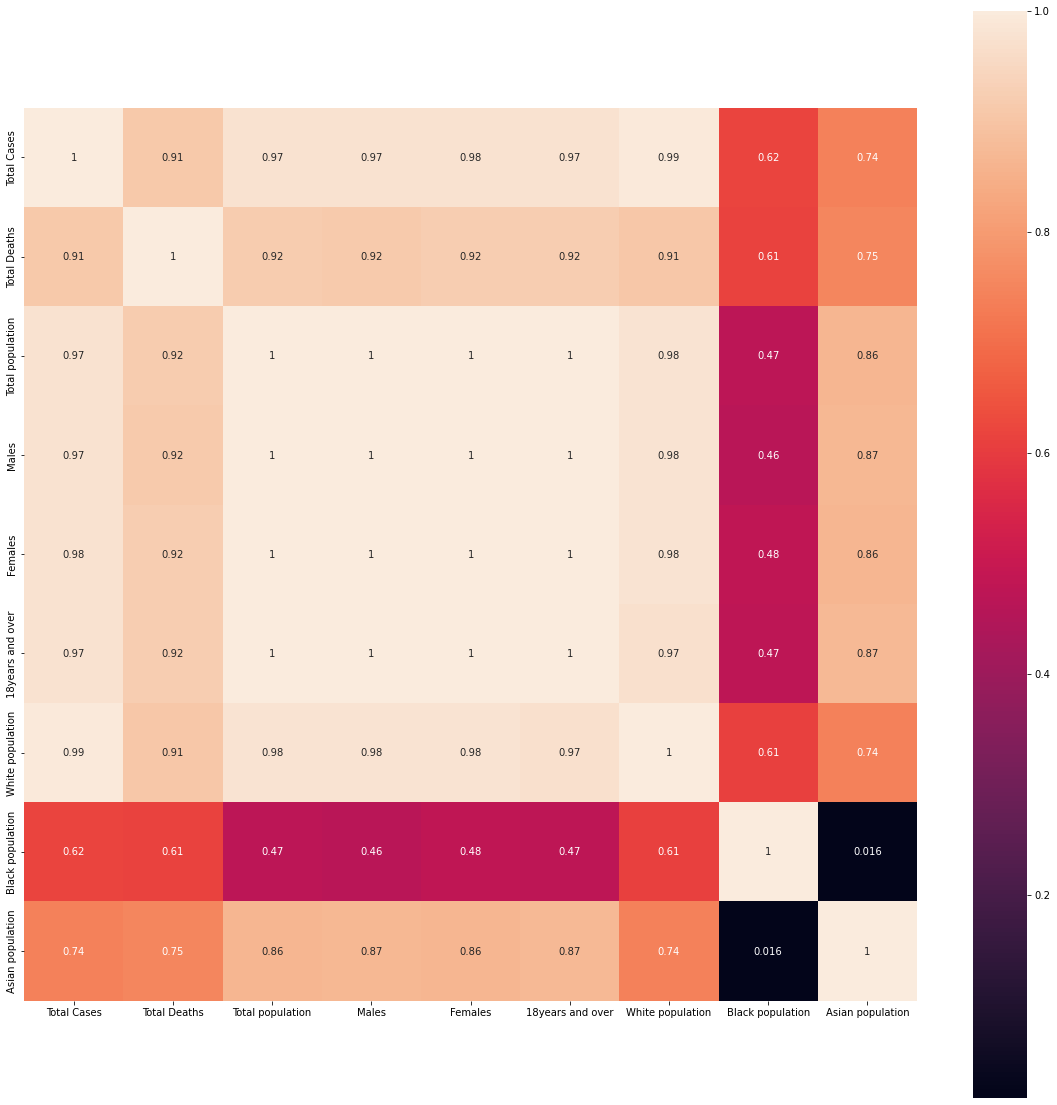

In [49]:
corr1 = merged_selected.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr1, annot=True, square=True)
#fig11.write_image('../../../../Images/member/Saipavan Tadikonda/Stage_3/fig11.png')
#f11 = fig11.to_image(format="png")
#Image(f11)


Normalizing all the columns by population per 1000000

In [50]:
merged_selected_1 = pd.DataFrame()
merged_selected_1['State'] = merged_selected['State']
merged_selected_1['Normalized cases'] = (merged_selected['Total Cases']/merged_selected['Total population'])*1000000
merged_selected_1['Normalized deaths'] = (merged_selected['Total Deaths']/merged_selected['Total population'])*1000000
merged_selected_1['N_Males'] = (merged_selected['Males']/merged_selected['Total population'])*1000000
merged_selected_1['N_Females'] = (merged_selected['Females']/merged_selected['Total population'])*1000000
merged_selected_1['N_18years and over'] = (merged_selected['18years and over']/merged_selected['Total population'])*1000000
merged_selected_1['N_White population'] = (merged_selected['White population']/merged_selected['Total population'])*1000000
merged_selected_1['N_Black population'] = (merged_selected['Black population']/merged_selected['Total population'])*1000000
merged_selected_1['N_Asian population'] = (merged_selected['Asian population']/merged_selected['Total population'])*1000000
merged_selected_1


,State,Normalized cases,Normalized deaths,N_Males,N_Females,N_18years and over,N_White population,N_Black population,N_Asian population
4,CA,100078.081134,1597.439250,497061.094128,502938.905872,770332.412107,597024.801534,57889.652747,144906.218507
9,FL,136180.201397,1755.269300,488995.837455,511004.162545,799897.864454,751245.309219,160706.606890,27331.640451
27,NC,108869.605439,1343.903229,486770.419828,513229.580172,776264.808265,686800.210738,214397.231881,28543.160190
34,NY,110506.169453,2705.760109,485430.520522,514569.479478,790086.243740,636597.380208,156622.779345,84180.418273
40,SC,128925.913489,1967.014858,485075.902156,514924.097844,780413.343993,671607.506843,267713.789380,15695.687107
43,TX,117754.465753,1876.588593,496588.249132,503411.750868,740331.821513,739658.239651,121305.985919,48026.606130


Calculating the correlation using the corr function.

In [51]:
merged_selected_1.corr()


,Normalized cases,Normalized deaths,N_Males,N_Females,N_18years and over,N_White population,N_Black population,N_Asian population
Normalized cases,1.000000,0.077757,-0.370811,0.370811,0.353275,0.738730,0.526443,-0.760990
Normalized deaths,0.077757,1.000000,-0.344272,0.344272,0.224269,-0.188578,0.038155,0.115245
N_Males,-0.370811,-0.344272,1.000000,-1.000000,-0.689175,-0.028803,-0.837581,0.570243
N_Females,0.370811,0.344272,-1.000000,1.000000,0.689175,0.028803,0.837581,-0.570243
N_18years and over,0.353275,0.224269,-0.689175,0.689175,1.000000,-0.099461,0.324480,-0.139168
N_White population,0.738730,-0.188578,-0.028803,0.028803,-0.099461,1.000000,0.270329,-0.758841
N_Black population,0.526443,0.038155,-0.837581,0.837581,0.324480,0.270329,1.000000,-0.830861
N_Asian population,-0.760990,0.115245,0.570243,-0.570243,-0.139168,-0.758841,-0.830861,1.000000


<AxesSubplot:>

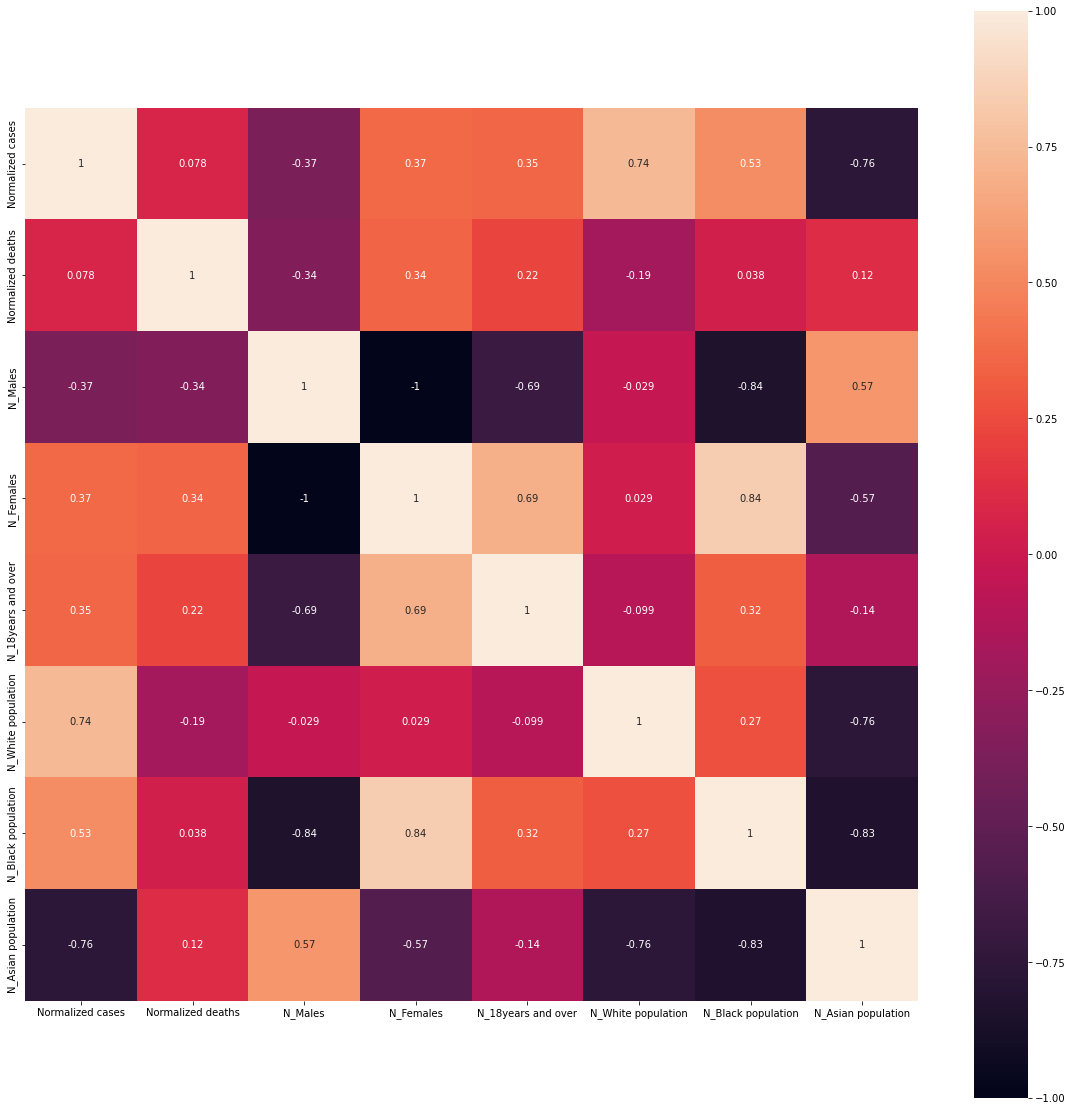

In [52]:
corr2 = merged_selected_1.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr2, annot=True, square=True)

Separating the NC state data from covid dataset into the separate dataframe

In [53]:
long_nc = long[long['State']=='NC']
long_nc

,countyFIPS,County Name,State,StateFIPS,Total Cases,Total Deaths,Population
1859,37001,Alamance County,NC,37,20380.0,289.0,24913.0
1860,37005,Alleghany County,NC,37,1143.0,5.0,169509.0
1861,37007,Anson County,NC,37,2847.0,57.0,37497.0
1862,37009,Ashe County,NC,37,2456.0,45.0,11137.0
1863,37011,Avery County,NC,37,2238.0,21.0,24446.0
...,...,...,...,...,...,...,...
1953,37191,Wayne County,NC,37,12491.0,247.0,11580.0
1954,37193,Wilkes County,NC,37,7813.0,119.0,56177.0
1955,37195,Wilson County,NC,37,10502.0,186.0,123131.0
1956,37197,Yadkin County,NC,37,4541.0,56.0,68412.0


Selecting all the columns excluding population

In [54]:
long_nc_final = long_nc[['County Name','State','Total Cases','Total Deaths']]
long_nc_final

,County Name,State,Total Cases,Total Deaths
1859,Alamance County,NC,20380.0,289.0
1860,Alleghany County,NC,1143.0,5.0
1861,Anson County,NC,2847.0,57.0
1862,Ashe County,NC,2456.0,45.0
1863,Avery County,NC,2238.0,21.0
...,...,...,...,...
1953,Wayne County,NC,12491.0,247.0
1954,Wilkes County,NC,7813.0,119.0
1955,Wilson County,NC,10502.0,186.0
1956,Yadkin County,NC,4541.0,56.0


Separating the NC state data into separate dataframe from modified enrichment census demographic dataset

In [55]:
census1_nc = census1[census1['State']=='NC']
census1_nc

,countyFIPS,County Name,State,Total population,Males,Females,Sex ratio(males per 100 females),Under 5years,5-9years,10-14years,...,18years and over,18years and over Male,18years and over Female,Sex ratio(18years and over),White population,Black population,Asian population,Voting population,Voting population(Male),Voting population(Female)
1890,37001,Alamance County,NC,163324,77542,85782,90.4,9508,9629,10889,...,126786,58853,67933,86.6,113953,31926,2602,118587,54437,64150
1891,37003,Alexander County,NC,37213,18940,18273,103.7,1869,1863,2442,...,29645,15200,14445,105.2,32622,2173,389,28937,14904,14033
1892,37005,Alleghany County,NC,11008,5404,5604,96.4,456,495,615,...,9090,4491,4599,97.7,10501,267,50,8716,4224,4492
1893,37007,Anson County,NC,24902,13056,11846,110.2,1172,1357,1411,...,20071,10638,9433,112.8,11892,12094,331,19678,10320,9358
1894,37009,Ashe County,NC,26863,13207,13656,96.7,1142,1210,1562,...,22007,10677,11330,94.2,25628,197,120,21415,10322,11093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,37191,Wayne County,NC,123603,60358,63245,95.4,8244,7598,8682,...,94191,45315,48876,92.7,78721,37666,1488,87826,42179,45647
1986,37193,Wilkes County,NC,68469,33733,34736,97.1,3426,3890,4141,...,54375,26515,27860,95.2,62347,2712,398,52699,25542,27157
1987,37195,Wilson County,NC,81435,38537,42898,89.8,4814,5059,5641,...,62603,28936,33667,85.9,41323,32275,675,59542,27128,32414
1988,37197,Yadkin County,NC,37602,18625,18977,98.1,1950,2069,2433,...,29632,14436,15196,95.0,34639,1320,23,28279,13701,14578


Creating a separate dataframe by selecting the required columns 

In [56]:
census1_nc_final = census1_nc[['County Name','State','Total population','Males','Females','18years and over','White population','Black population','Asian population']]
census1_nc_final.head()

,County Name,State,Total population,Males,Females,18years and over,White population,Black population,Asian population
1890,Alamance County,NC,163324,77542,85782,126786,113953,31926,2602
1891,Alexander County,NC,37213,18940,18273,29645,32622,2173,389
1892,Alleghany County,NC,11008,5404,5604,9090,10501,267,50
1893,Anson County,NC,24902,13056,11846,20071,11892,12094,331
1894,Ashe County,NC,26863,13207,13656,22007,25628,197,120


Removing the spaces of the County Names by applying the strip function.

In [57]:
long_nc_final['County Name']= long_nc_final['County Name'].apply(lambda x: x.strip())
census1_nc_final['County Name']= census1_nc_final['County Name'].apply(lambda x: x.strip())

Merging the nc covid dataframe and nc census dataframe on County Name and State

In [58]:
merged_nc = pd.merge(long_nc_final, census1_nc_final, on = ['County Name','State'])
merged_nc

,County Name,State,Total Cases,Total Deaths,Total population,Males,Females,18years and over,White population,Black population,Asian population
0,Alamance County,NC,20380.0,289.0,163324,77542,85782,126786,113953,31926,2602
1,Alleghany County,NC,1143.0,5.0,11008,5404,5604,9090,10501,267,50
2,Anson County,NC,2847.0,57.0,24902,13056,11846,20071,11892,12094,331
3,Ashe County,NC,2456.0,45.0,26863,13207,13656,22007,25628,197,120
4,Avery County,NC,2238.0,21.0,17506,9616,7890,14926,16109,693,77
...,...,...,...,...,...,...,...,...,...,...,...
94,Wayne County,NC,12491.0,247.0,123603,60358,63245,94191,78721,37666,1488
95,Wilkes County,NC,7813.0,119.0,68469,33733,34736,54375,62347,2712,398
96,Wilson County,NC,10502.0,186.0,81435,38537,42898,62603,41323,32275,675
97,Yadkin County,NC,4541.0,56.0,37602,18625,18977,29632,34639,1320,23


Calculating the correlation of the merged dataframe by using corr function

In [59]:
merged_nc.corr()

,Total Cases,Total Deaths,Total population,Males,Females,18years and over,White population,Black population,Asian population
Total Cases,1.000000,0.936335,0.987802,0.987341,0.987784,0.986431,0.960414,0.943655,0.921924
Total Deaths,0.936335,1.000000,0.918416,0.916278,0.919994,0.919055,0.900041,0.875294,0.802921
Total population,0.987802,0.918416,1.000000,0.999749,0.999781,0.999742,0.981926,0.938092,0.949076
Males,0.987341,0.916278,0.999749,1.000000,0.999062,0.999298,0.982734,0.935261,0.948696
Females,0.987784,0.919994,0.999781,0.999062,1.000000,0.999704,0.980728,0.940308,0.949000
18years and over,0.986431,0.919055,0.999742,0.999298,0.999704,1.000000,0.982731,0.936933,0.947100
White population,0.960414,0.900041,0.981926,0.982734,0.980728,0.982731,1.000000,0.860012,0.917527
Black population,0.943655,0.875294,0.938092,0.935261,0.940308,0.936933,0.860012,1.000000,0.898830
Asian population,0.921924,0.802921,0.949076,0.948696,0.949000,0.947100,0.917527,0.898830,1.000000


Plotting the correlation using the heatmap from sns

<AxesSubplot:>

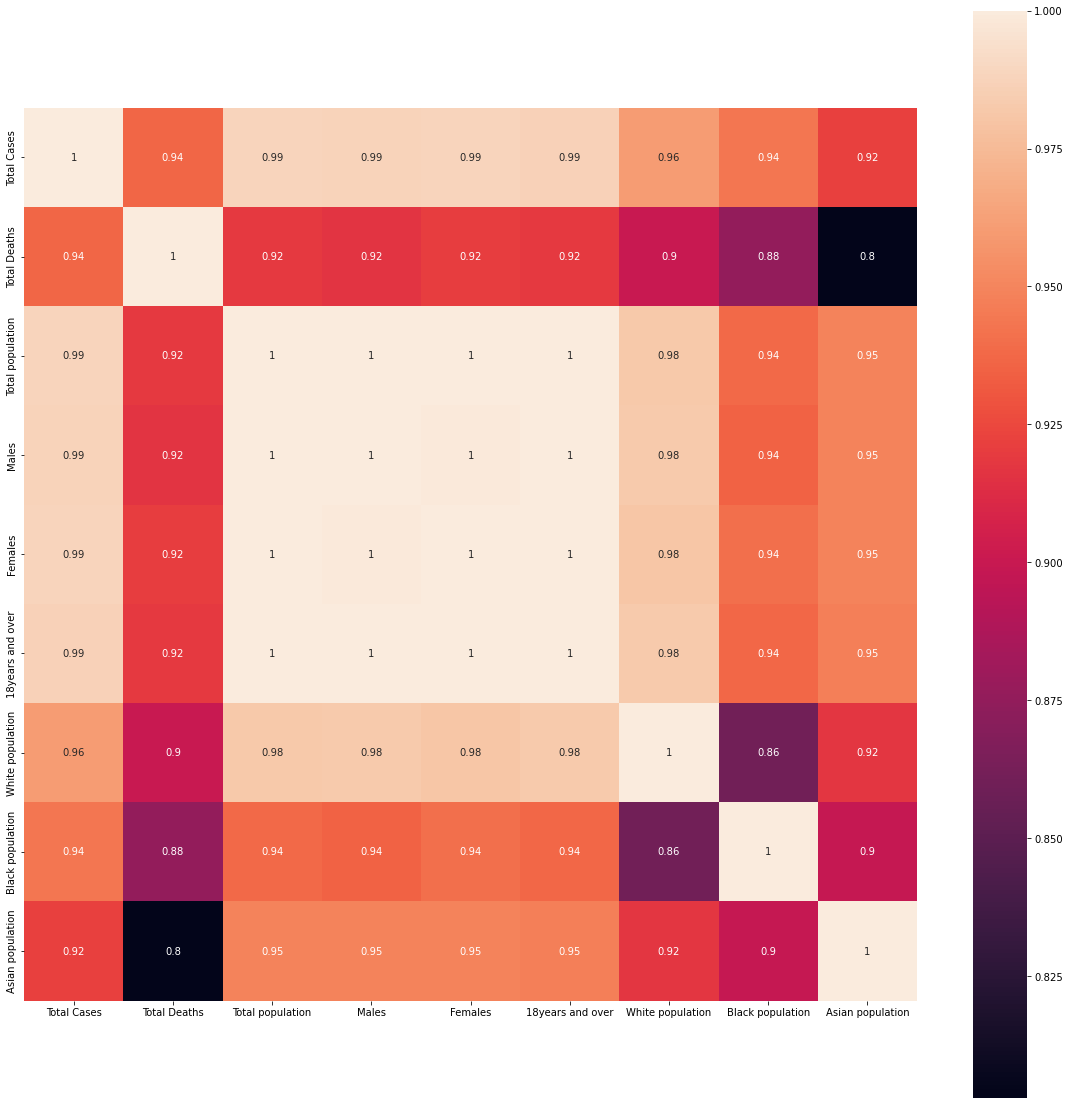

In [60]:
corr3 = merged_nc.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr3, annot=True, square=True)

Normalizing all the columns by population per 100000

In [61]:
merged_nc_1 = pd.DataFrame()
merged_nc_1['County Name']= merged_nc['County Name']
merged_nc_1['State'] = merged_nc['State']
merged_nc_1['Normalized cases'] = (merged_nc['Total Cases']/merged_nc['Total population'])*100000
merged_nc_1['Normalized deaths'] = (merged_nc['Total Deaths']/merged_nc['Total population'])*100000
merged_nc_1['N_Males'] = (merged_nc['Males']/merged_nc['Total population'])*100000
merged_nc_1['N_Females'] = (merged_nc['Females']/merged_nc['Total population'])*100000
merged_nc_1['N_18years and over'] = (merged_nc['18years and over']/merged_nc['Total population'])*100000
merged_nc_1['N_White population'] = (merged_nc['White population']/merged_nc['Total population'])*100000
merged_nc_1['N_Black population'] = (merged_nc['Black population']/merged_nc['Total population'])*100000
merged_nc_1['N_Asian population'] = (merged_nc['Asian population']/merged_nc['Total population'])*100000
merged_nc_1

,County Name,State,Normalized cases,Normalized deaths,N_Males,N_Females,N_18years and over,N_White population,N_Black population,N_Asian population
0,Alamance County,NC,12478.264064,176.948887,47477.406872,52522.593128,77628.517548,69771.129779,19547.647621,1593.152262
1,Alleghany County,NC,10383.357558,45.421512,49091.569767,50908.430233,82576.308140,95394.258721,2425.508721,454.215116
2,Anson County,NC,11432.816641,228.897277,52429.523733,47570.476267,80599.951811,47755.200386,48566.380210,1329.210505
3,Ashe County,NC,9142.686967,167.516659,49164.278003,50835.721997,81923.091241,95402.598370,733.350705,446.711090
4,Avery County,NC,12784.188278,119.958871,54929.738375,45070.261625,85262.195819,92019.878899,3958.642751,439.849195
...,...,...,...,...,...,...,...,...,...,...
94,Wayne County,NC,10105.741770,199.833337,48832.148087,51167.851913,76204.461057,63688.583610,30473.370387,1203.854275
95,Wilkes County,NC,11411.003520,173.801282,49267.551739,50732.448261,79415.501906,91058.727307,3960.916619,581.284961
96,Wilson County,NC,12896.174863,228.403021,47322.404372,52677.595628,76874.808129,50743.537791,39632.836004,828.881930
97,Yadkin County,NC,12076.485293,148.928248,49531.939790,50468.060210,78804.318919,92120.099995,3510.451572,61.166959


Calculating the correlation by using the corr function

In [62]:
merged_nc_1.corr()

,Normalized cases,Normalized deaths,N_Males,N_Females,N_18years and over,N_White population,N_Black population,N_Asian population
Normalized cases,1.000000,0.455191,0.028590,-0.028590,-0.414523,-0.193110,0.140367,-0.086248
Normalized deaths,0.455191,1.000000,-0.134639,0.134639,-0.096699,-0.351445,0.397730,-0.305082
N_Males,0.028590,-0.134639,1.000000,-1.000000,0.181394,0.049125,-0.034846,-0.105399
N_Females,-0.028590,0.134639,-1.000000,1.000000,-0.181394,-0.049125,0.034846,0.105399
N_18years and over,-0.414523,-0.096699,0.181394,-0.181394,1.000000,0.342761,-0.214288,-0.288708
N_White population,-0.193110,-0.351445,0.049125,-0.049125,0.342761,1.000000,-0.937200,-0.084163
N_Black population,0.140367,0.397730,-0.034846,0.034846,-0.214288,-0.937200,1.000000,-0.004901
N_Asian population,-0.086248,-0.305082,-0.105399,0.105399,-0.288708,-0.084163,-0.004901,1.000000


Plotting the correlation using the heatmap from sns

<AxesSubplot:>

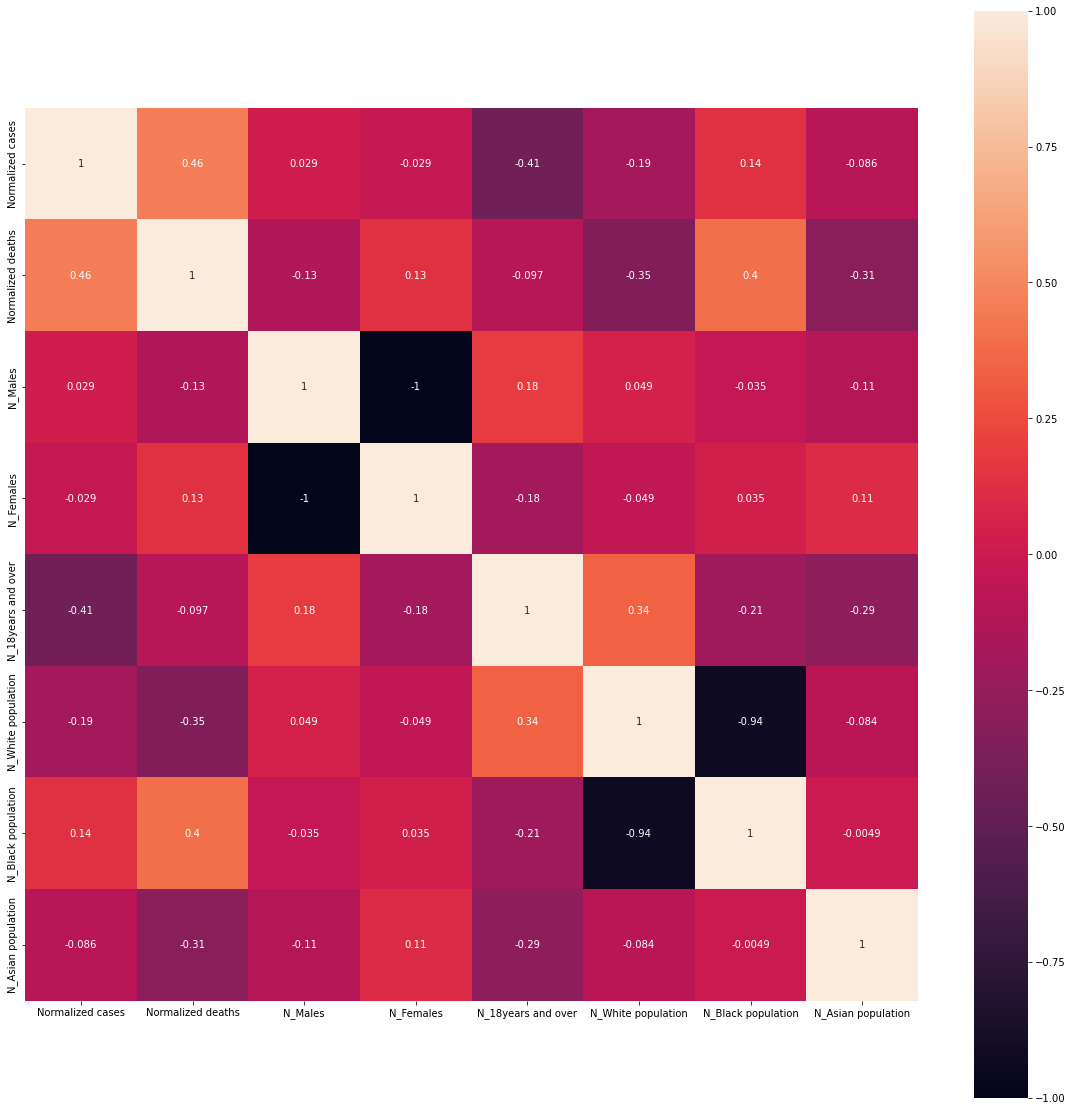

In [63]:
corr4 = merged_nc_1.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr4, annot=True, square=True)

## Task 4: Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against


- Are the covid cases higher among the males?
- Does the covid cases increases if there is increase in population?
- Are the covid cases higher among the white population?
- Are covid cases higher for 18years and over age group?
